In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
#plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
matplotlib.rcParams['axes.unicode_minus'] = False 


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from statsmodels.tsa.stattools import kpss , adfuller
import statsmodels.graphics.tsaplots as sgt 

import statsmodels.api as sm 

import warnings
warnings.filterwarnings(action='ignore')

import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import matplotlib.font_manager
import math
# 폰트 설치 참고 https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html (ubuntu)
print([f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name])

['NanumGothicCoding', 'NanumGothicCoding']


In [5]:
from datetime import datetime 

today = datetime.strftime(datetime.today(),"%Y-%m-%d")

In [8]:
import yfinance as yf
# Request historical data for past 5 years
df = yf.download("^GSPC", start='2021-01-01', end=today)
df.columns = [i.replace(" ", "_") for i in list(df)]



[*********************100%***********************]  1 of 1 completed


# Change Ratio


$$ Change = \frac{Close_t - Close_{t-1}}{Close_t}$$

In [7]:
df["Change"] = (df["Close"] - df["Close"].shift(1)) / df["Close"]
df = df.dropna(axis=0)

In [8]:
df.head()

Open         High          Low        Close    Adj_Close  \
Date                                                                          
2021-01-04  3764.610107  3769.989990  3662.709961  3700.649902  3700.649902   
2021-01-05  3698.020020  3737.830078  3695.070068  3726.860107  3726.860107   
2021-01-06  3712.199951  3783.040039  3705.340088  3748.139893  3748.139893   
2021-01-07  3764.709961  3811.550049  3764.709961  3803.790039  3803.790039   
2021-01-08  3815.050049  3826.689941  3783.600098  3824.679932  3824.679932   

                Volume    Change  
Date                              
2021-01-04  5006680000 -0.014976  
2021-01-05  4582620000  0.007033  
2021-01-06  6049970000  0.005677  
2021-01-07  5080870000  0.014630  
2021-01-08  4764180000  0.005462

# Stock Candle Stick

* 특정데이터에서 오류가 있음을 알 수 있음.
* 4월 12, 13,14일 데이터 존재하지 않음.

In [9]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Adj_Close'])])

fig.show()

In [10]:
# outlier
selected_outlier = df.query("Open <= 0 | High <= 0 | Low <= 0 | Adj_Close <=0 | Volume <=0")
print(selected_outlier)
remove_time_idx = selected_outlier.index.tolist()
df = df[~df.index.isin(remove_time_idx)]

Empty DataFrame
Columns: [Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []


# 수정된 stock 데이터 candlestick

In [11]:
import yfinance as yf
# Request historical data for past 5 years
df = yf.download("^GSPC", start='2018-12-31', end="2022-01-01")
df.columns = [i.replace(" ", "_") for i in list(df)]


fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Adj_Close'])])
fig.update_layout(
    title="(2018-12-31 ~ 2021-12-31)",
    xaxis_title="Date",
    yaxis_title="US Dollars",
    font_family="Courier New",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=30,
    legend_title_font_color="green",
    xaxis_rangeslider_visible=False,
    shapes = [dict(
        x0='2020-12-31', x1='2020-12-31', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-01-02', y=0.05, xref='x', yref='paper', 
        showarrow=False, xanchor='left', text='Test',
        font = {"color" : 'red'}
        ),
        dict(
            x='2020-11-18', y=0.05, xref='x', yref='paper',
            showarrow=False, xanchor='left', text='Train',
            font = {"color" : 'blue'}
        )

        
        ]
)
fig.show()

[*********************100%***********************]  1 of 1 completed


In [26]:
date_pd = pd.to_datetime(pd.Series(df.index),format="%Y-%m-%d")
df["day_of_week"] = date_pd.dt.day_name().values
df["month"] = date_pd.dt.month.values
df["year"] = date_pd.dt.year.values
df["day"] = date_pd.dt.day.values
df["week_of_year"] = date_pd.dt.week.values
df.head()

Open         High          Low        Close    Adj_Close  \
Date                                                                          
2021-01-04  3764.610107  3769.989990  3662.709961  3700.649902  3700.649902   
2021-01-05  3698.020020  3737.830078  3695.070068  3726.860107  3726.860107   
2021-01-06  3712.199951  3783.040039  3705.340088  3748.139893  3748.139893   
2021-01-07  3764.709961  3811.550049  3764.709961  3803.790039  3803.790039   
2021-01-08  3815.050049  3826.689941  3783.600098  3824.679932  3824.679932   

                Volume    Change day_of_week  month  year  day  week_of_year  
Date                                                                          
2021-01-04  5006680000 -0.014976      Monday      1  2021    4             1  
2021-01-05  4582620000  0.007033     Tuesday      1  2021    5             1  
2021-01-06  6049970000  0.005677   Wednesday      1  2021    6             1  
2021-01-07  5080870000  0.014630    Thursday      1  2021    7             1  
2021-01-08  4764180000  0.005462      Friday      1  2021    8             1

# 연도별, 월별 분포 시각화

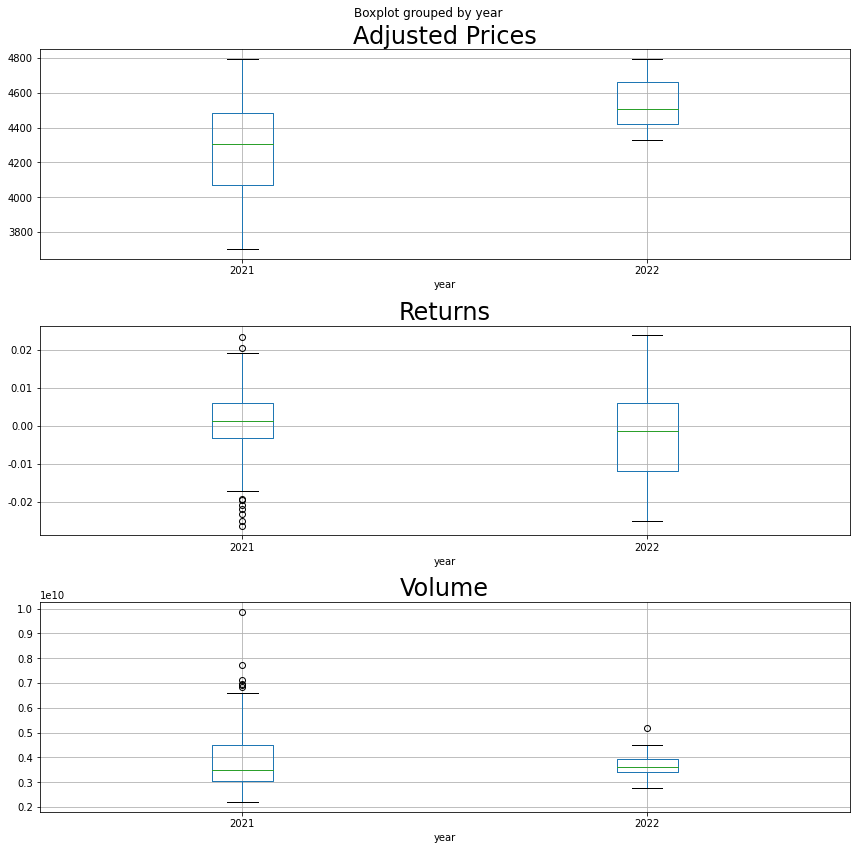

In [27]:
plt.rcParams["figure.figsize"] = 24, 21

fig, axes = plt.subplots(3, 1,figsize=(12,12))

df.boxplot(by ='year', column =['Adj_Close'], ax = axes[0])
axes[0].set_title("Adjusted Prices", size = 24)

df.boxplot(by ='year', column =['Change'], ax = axes[1])
axes[1].set_title("Returns", size = 24)

df.boxplot(by ='year', column =['Volume'], ax = axes[2])
axes[2].set_title("Volume", size = 24)
plt.tight_layout()
plt.show()

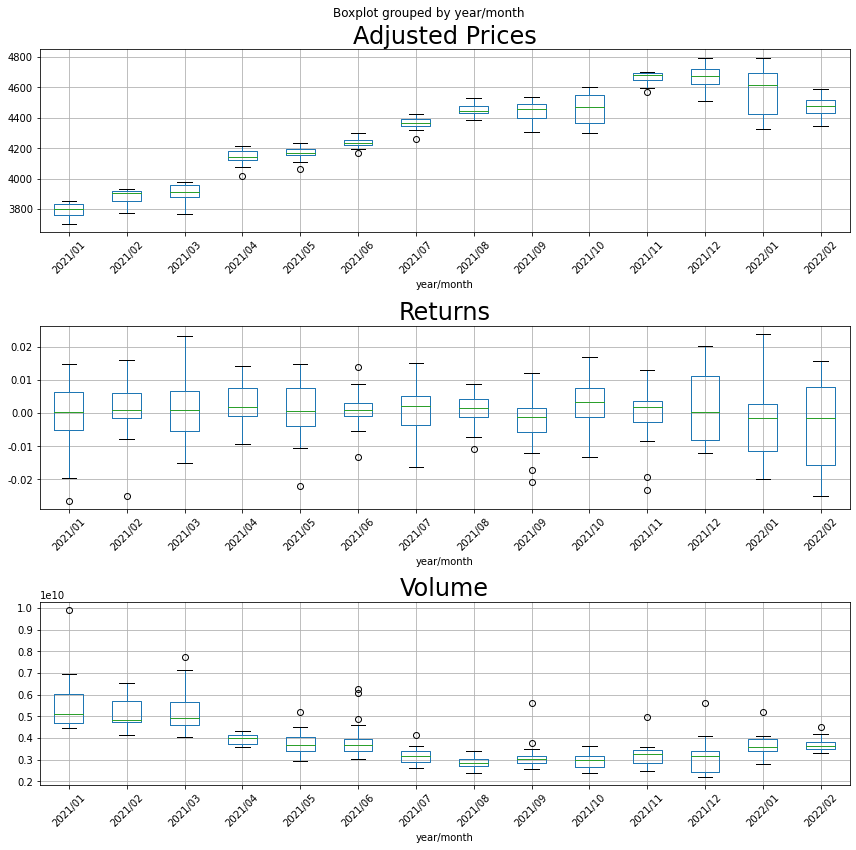

In [29]:
df["year/month"]= df.apply(lambda x :  f"{int(x['year']):04d}/{int(x['month']):02d}",axis=1)# 
plt.rcParams["figure.figsize"] = 24, 21

fig, axes = plt.subplots(3, 1,figsize=(12,12))

df.boxplot(by ='year/month', column =['Adj_Close'], ax = axes[0])
axes[0].set_title("Adjusted Prices", size = 24)

df.boxplot(by ='year/month', column =['Change'], ax = axes[1])
axes[1].set_title("Returns", size = 24)

df.boxplot(by ='year/month', column =['Volume'], ax = axes[2])
axes[2].set_title("Volume", size = 24)
for ax in axes :
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout()
plt.show()

# Return 계산하기 

$\text{daily return}=\frac{금일종가-어제종가}{어제종가}$

$\text{montly return}=\frac{금일종가-할달전종가}{한달전종가}$

* Finance DataReader에서 제공하는 Change가 하루 동안의 수익률을 의미함

In [30]:
daily_returns = df['Adj_Close'].pct_change()
monthly_returns = df['Adj_Close'].resample('M').ffill().pct_change()


In [31]:
calculated = pd.DataFrame(daily_returns).describe().T
original = pd.DataFrame(df["Change"].describe()).T
summary=pd.concat([original , calculated],axis=0)
summary.index = ["기존","계산된 값"]
summary

count      mean       std       min       25%       50%       75%  \
기존     286.0  0.000473  0.008912 -0.026355 -0.004014  0.001089  0.006137   
계산된 값  285.0  0.000606  0.008861 -0.025678 -0.003841  0.001165  0.006224   

            max  
기존     0.023769  
계산된 값  0.024348

# 하루 수익률 히스토그램

* `Change` 변수 사용 
* 하루 수익률 히스토그램 시각화 


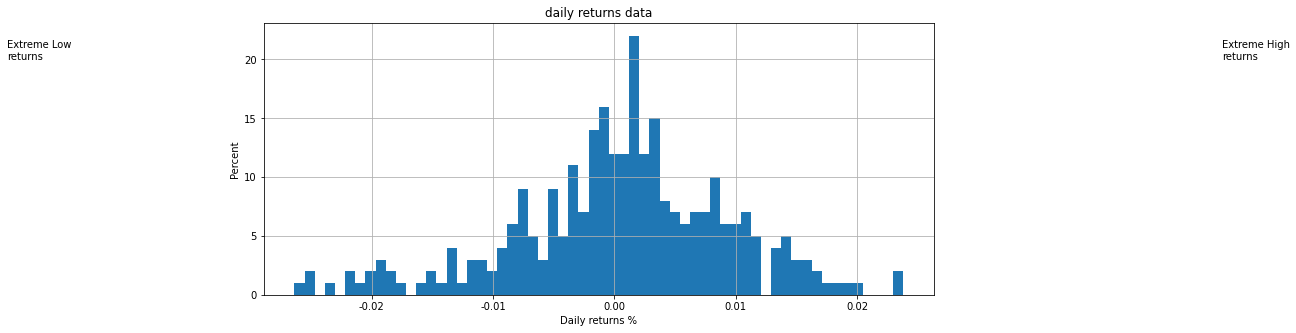

In [32]:
fig = plt.figure(figsize=(12,5))
df['Change'].plot.hist(bins = 60)
plt.xlabel("Daily returns %")
plt.ylabel("Percent")
plt.title("daily returns data")
plt.text(-0.05,20,"Extreme Low\nreturns")
plt.text(0.05,20,"Extreme High\nreturns")
plt.show()

# 하루 수익률 시각화

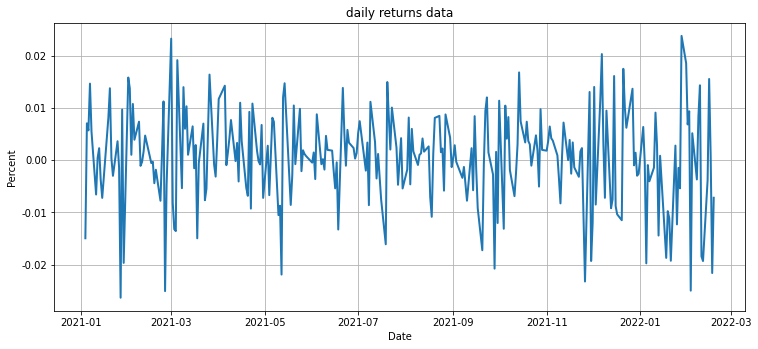

In [33]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df['Change'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("daily returns data")
plt.show()

# 누적 수익률 분석

* cumprod 함수를 사용하여 누적 곱을 계산함.
* 전반적으로 우상향하는 형태를 띄고 있다가, 최근(2021-09)에 특정 이벤트로 인해서 급락하는 현상이 생김

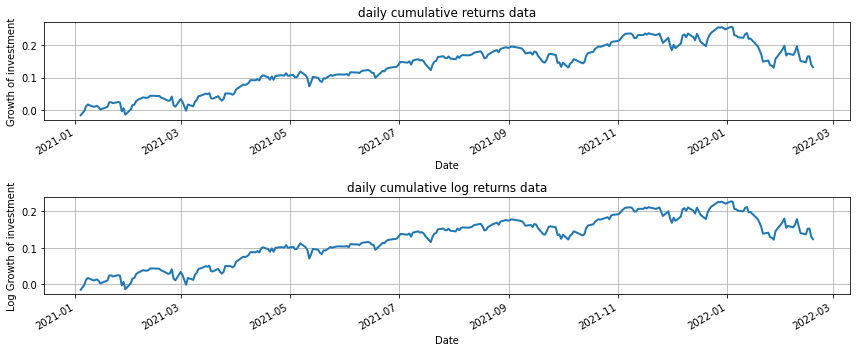

In [34]:
daily_returns = (df['Change'] + 1).cumprod() -1 
daily_log_returns = np.log((df['Change'] + 1).cumprod())
fig , ax = plt.subplots(nrows=2 , ncols=1,figsize=(12,5))
axes = ax.flatten()
daily_returns.plot(ax=axes[0])
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Growth of investment")
axes[0].set_title("daily cumulative returns data")
daily_log_returns.plot(ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Log Growth of investment")
axes[1].set_title("daily cumulative log returns data")
fig.tight_layout()
plt.show()

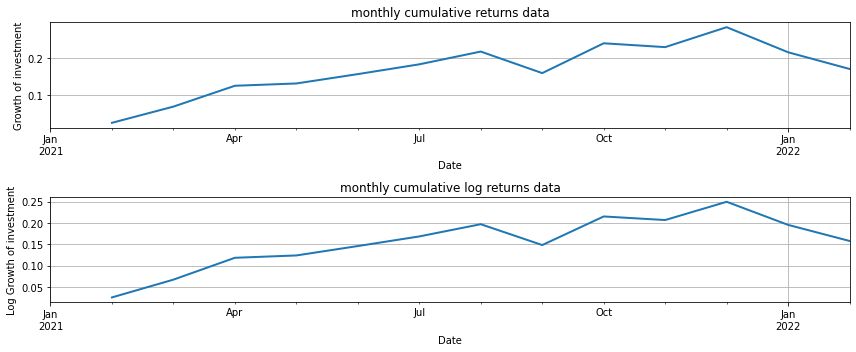

In [35]:
monthly_cum_returns = (monthly_returns + 1).cumprod() -1 
monthly_log_cum_returns = np.log((monthly_returns + 1).cumprod()  )
fig , ax = plt.subplots(nrows=2 , ncols=1,figsize=(12,5))
axes = ax.flatten()
monthly_cum_returns.plot(ax=axes[0])
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Growth of investment")
axes[0].set_title("monthly cumulative returns data")
monthly_log_cum_returns.plot(ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Log Growth of investment")
axes[1].set_title("monthly cumulative log returns data")
fig.tight_layout()
plt.show()

# Adjusted Close 이동 평균(rolling mean) 시각화

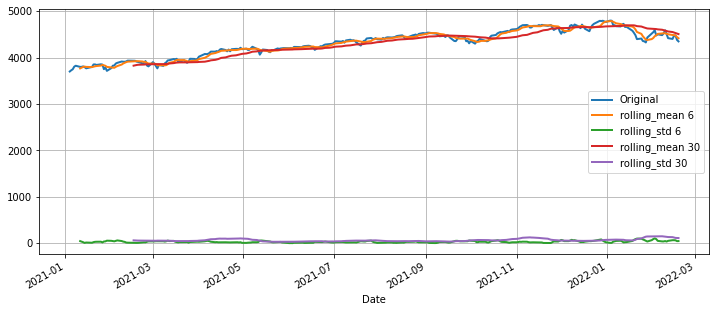

In [36]:
plt.figure(figsize=(12,5))
closed_df = df["Adj_Close"]
closed_df.plot(label='Original', legend=True)
closed_df.rolling(6).mean().plot(legend=True, label='rolling_mean 6')
closed_df.rolling(6).std().plot(legend=True, label='rolling_std 6')
closed_df.rolling(30).mean().plot(legend=True, label='rolling_mean 30')
closed_df.rolling(30).std().plot(legend=True, label='rolling_std 30')
plt.show()

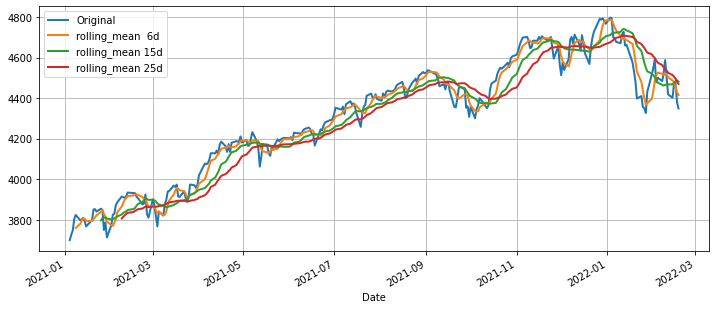

In [37]:
plt.figure(figsize=(12,5))
closed_df = df["Adj_Close"]
closed_df.plot(label='Original', legend=True)
closed_df.rolling(5).mean().plot(legend=True,  label='rolling_mean  6d')
closed_df.rolling(15).mean().plot(legend=True, label='rolling_mean 15d')
closed_df.rolling(25).mean().plot(legend=True, label='rolling_mean 25d')
plt.show()

# Volatitlty 계산 하기 

$\sigma_p = \sigma_{\text{daily}} \times \sqrt{p}$

$\sigma_{\text{annually}}= \sigma_{\text{daily}} \times \sqrt{252}$

In [38]:
df["log_returns"] = np.log(df["Adj_Close"]/ df["Adj_Close"].shift())
print(df['log_returns'].std())
volatility = df['log_returns'].std()*252**.5
volatility

0.008869756214497386


0.14080301479997856

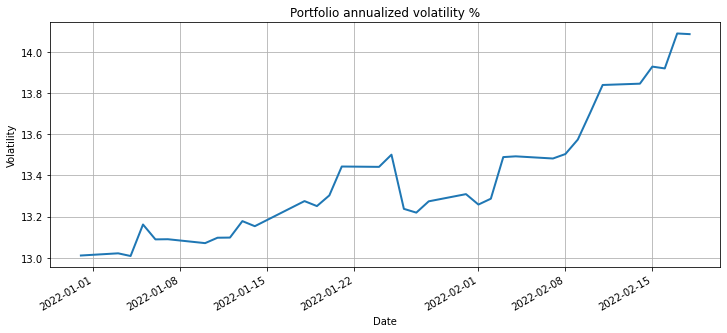

In [39]:
TRADING_DAYS = 252 
returns_portfolio = df['log_returns']
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS) * 100
volatility_portfolio.tail()
fig = plt.figure(figsize=(12,5))
ax2 = fig.add_subplot(1, 1, 1)
volatility_portfolio.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.set_title('Portfolio annualized volatility %')
plt.show()

return = logarithm(current closing price / previous closing price)

$\text{return} = log(\frac{현재 종가}{전날 종가})$

$\text{returns} = \sum{return}$

$volatiltiy_{\text{annually}}= \text{returns} \times \sqrt{252}$

$\text{sharpe ratio} = \frac{(mean(returns) - risk-free rate)}{volatility}$

* sharpe ratio는 투자자가 부담하는 위험을 자산 수익률이 얼마나 잘 보상하는지를 규정한다. 
* 두 자산을 공동의 기준 지표와 비교할 경우 더 높은 sharpe ratio가 동일한 위험에 대해 더 높은 수익률을 제공한다고 한다. 


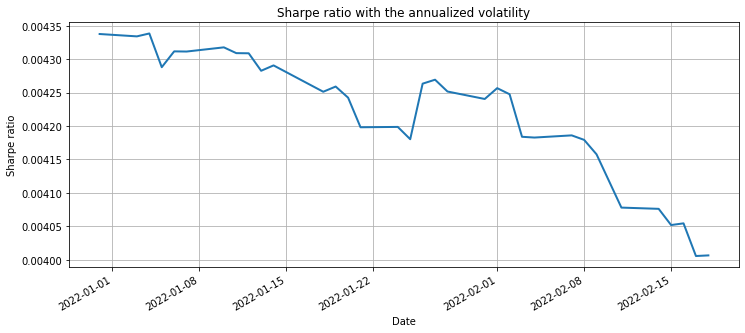

In [40]:
returns_portfolio = df['log_returns']
returns_portfolio.fillna(0, inplace=True)
volatility = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
sharpe_ratio = returns_portfolio.mean()/volatility
sharpe_ratio.tail()
fig = plt.figure(figsize=(12,5))
ax3 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe ratio')
ax3.set_title('Sharpe ratio with the annualized volatility')
plt.show()

In [41]:

daily_volatility = df['log_returns'].std() * 100
print('Daily volatility: ', f'{daily_volatility:.2f}%')

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', f'{monthly_volatility:.2f}%')

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', f'{annual_volatility:.2f}%')

Daily volatility:  0.89%
Monthly volatility:  4.06%
Annual volatility:  14.06%


# 변동성

카카오 데이터의 변동성은 현재까지 약 40% 정도가 되므로, 변동성이 크다고 할 수 있음

* 보통 12 미만이면, 낮다고 할 수 있고, 20 이상이면 높다고 할수 있다고 함.

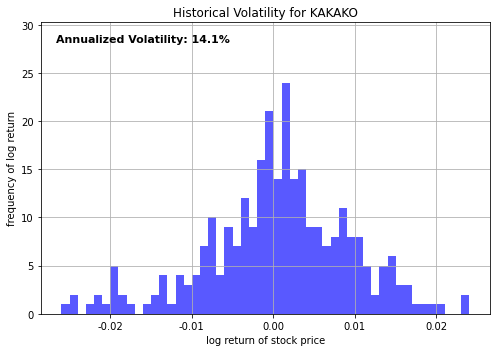

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n, bins, patches = ax.hist(
    df['log_returns'].values,
    bins=50, alpha=0.65, color='blue')

ax.set_xlabel('log return of stock price')
ax.set_ylabel('frequency of log return')
ax.set_title('Historical Volatility for KAKAKO')

# get x and y coordinate limits
x_corr = ax.get_xlim()
y_corr = ax.get_ylim()

# make room for text
header = y_corr[1] / 5
y_corr = (y_corr[0], y_corr[1] + header)
ax.set_ylim(y_corr[0], y_corr[1])

# print historical volatility on plot
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
ax.text(x, y , f'Annualized Volatility: {str(np.round(annual_volatility, 1))}%',
    fontsize=11, fontweight='bold')
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15
y -= (y_corr[1] - y_corr[0]) / 20

# save histogram plot of historical price volatility
fig.tight_layout()

# Distribution of Data

* 종가와 같은 가격 데이터는 3개의 봉우리 형태를 가지는 분포를 취하고 있음.
* Volume 같은 경우 로그 분포의 형태롤 띄고 있음.
* Change 같은 경우 정규 분포 형태를 띄고 있음.

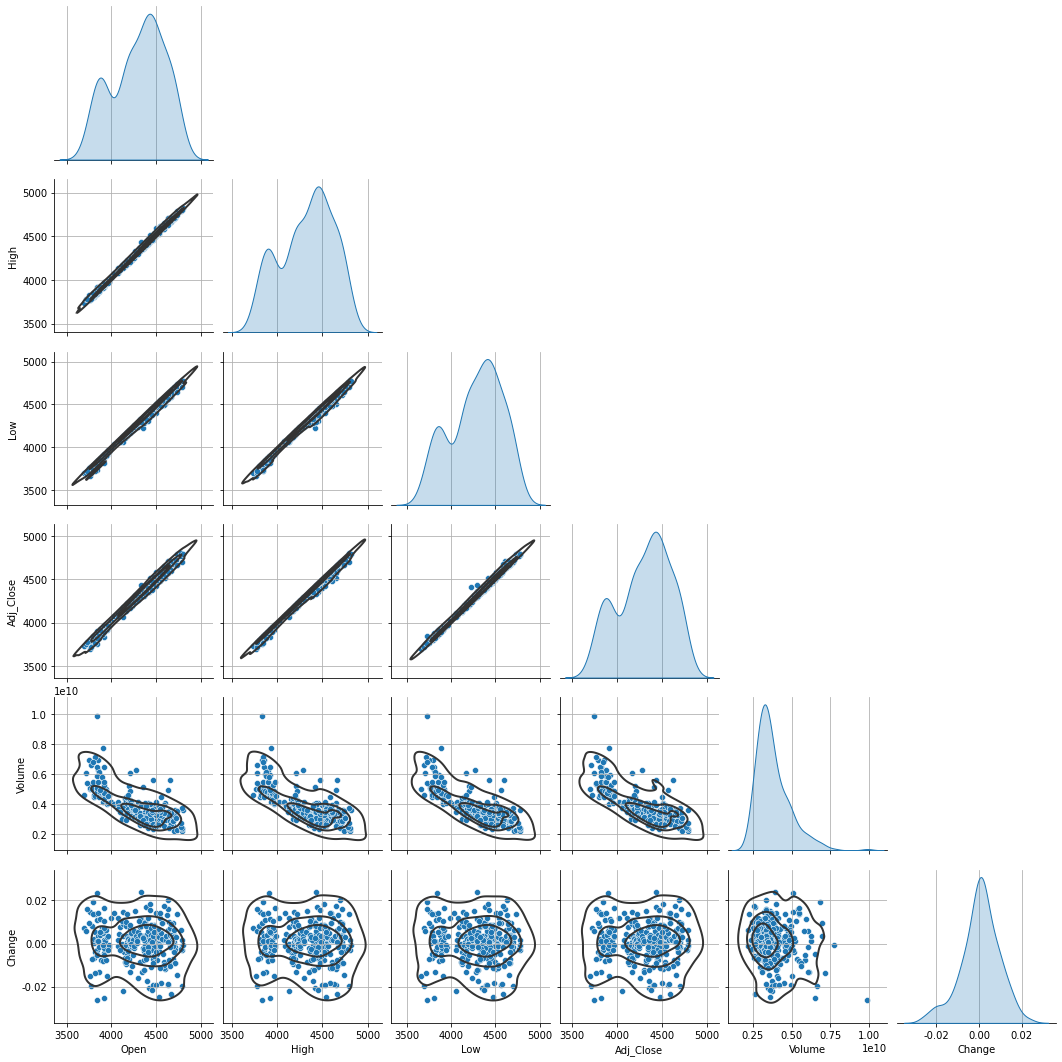

In [45]:
select_cols = ["Open","High","Low","Adj_Close","Volume","Change"]
g = sns.pairplot(df[select_cols], diag_kind="kde",corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


# 연도별 분포 현황

* 2020년보다 상대적으로 2021년에 성장하는 형태를 띄고 있기 때문에, 분포가 오른쪽으로 이동한 것과 같은 형태롤 띄고 있음.
* 비교적 2020년보다 2021년에 분산이 띄고 있어, 2020년보다는 좀 더 넓게 분포되어 보임
* 그렇지만 Change 같은 경우 2020년이나 2021년이나 정규 분포 형태를 띄고 있음.

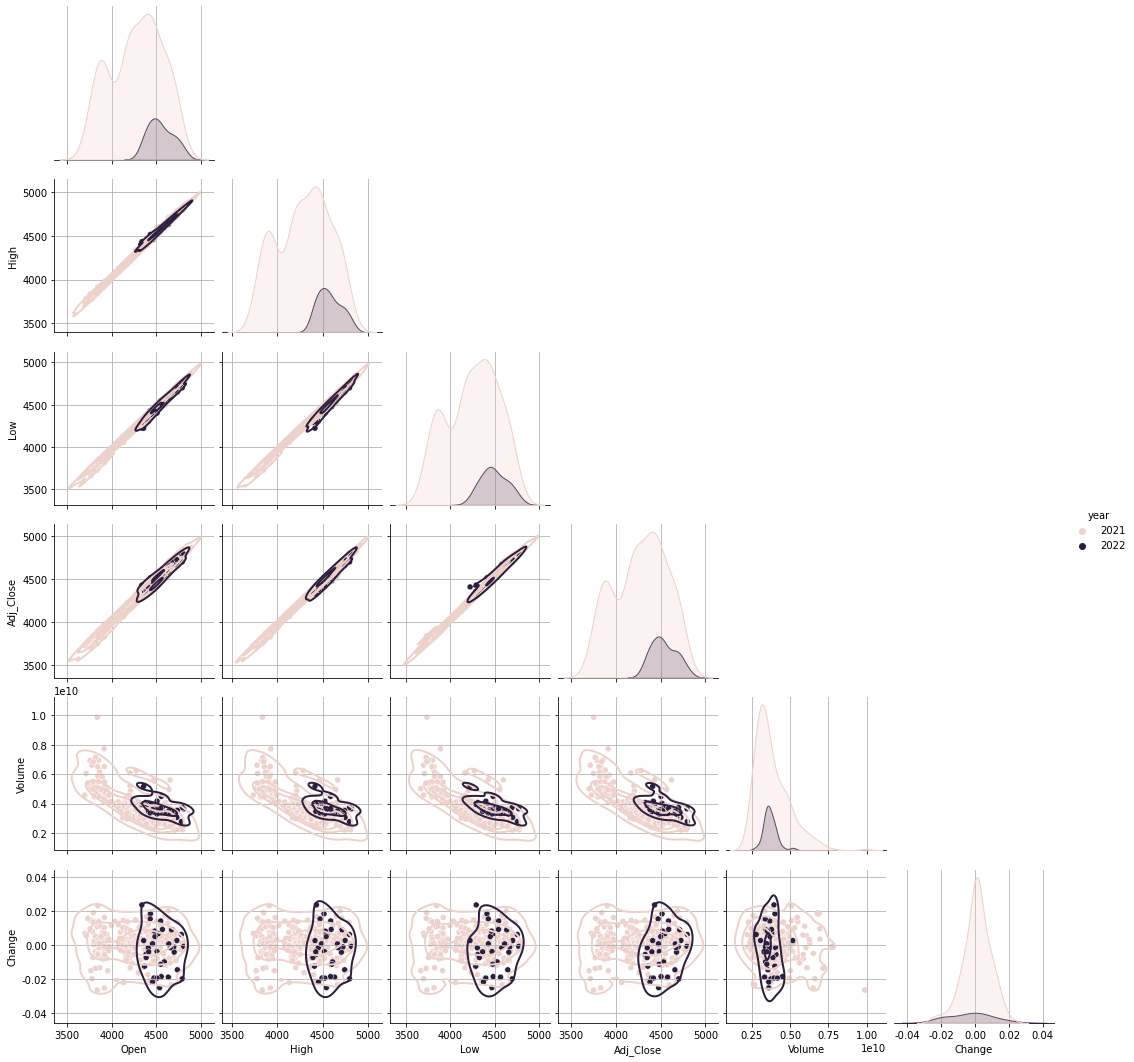

In [46]:
select_cols = ["Open","High","Low","Adj_Close","Volume","Change","year"]
g = sns.pairplot(df[select_cols], diag_kind="kde",corner=True,hue="year")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


# 데이터별 최소 최대 시점 결과

In [51]:
summary = pd.concat([df[select_cols].idxmax() , df[select_cols].idxmin()],axis=1)
summary.columns = ["idxmax", "idxmin"]
summary

idxmax     idxmin
Open      2022-01-04 2021-01-05
High      2022-01-04 2021-01-05
Low       2021-12-28 2021-01-04
Adj_Close 2022-01-03 2021-01-04
Volume    2021-01-27 2021-12-23
Change    2022-01-28 2021-01-27
year      2022-01-03 2021-01-04

# 정상성(Stationary) 검증 방법 - Dicky-Fuller test 

$HO$ (귀무가설) : 비정상이 아니다라고 할만한 근거가 없다.

$H1$ 대립가설 : 비정상이 아니다.

* p-value가 5% 이내면, 귀무가설 기각

* Adjusted Close를 통해 정상섬 검증

* p-value가 0.05보다 작지 않으므로, 귀무가설을 기각할 수 없다. 그래서 비정상이 아니라고 할만한 근거가 없기 때문에 비정상이라고 말할 수도 있다. 

# KPSS (단위근 검정 방법)

$HO$ (귀무가설) : 시계열 데이터가 정상성을 가진다.

$H1$ 대립가설 : 시계열 데이터가 정상성을 가지지 않는다. 

* p-value가 5% 이내면, 귀무가설 기각

In [52]:
def adf_test(df) :
    result = adfuller(df)
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print("Critic values")
    for k,v in result[4].items() :
        print("\t%s : %.3f" % (k,v))


def kpss_test(df) :
    statistics , p_value , n_lags, critic_values = kpss(df)
    print(f"KPSS Statistics : {statistics}") 
    print(f"p-value : {p_value}") 
    print(f"num lags : {n_lags}")
    print("Critic Values : ")
    for k ,v in critic_values.items() :
        print(f"   {k} : {v}")

In [54]:
adf_test(df["Adj_Close"])

Test statistic:  -2.119358196645613
p-value:  0.2368021514302917
Critic values
	1% : -3.454
	5% : -2.872
	10% : -2.572


귀무가설을 기각하므로, 시게열 데이터가 정상성을 가지지 않는다.

In [55]:
kpss_test(df["Adj_Close"])

KPSS Statistics : 2.403995360844739
p-value : 0.01
num lags : 10
Critic Values : 
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


# 로그 변환 후 정상성 검정 

* p-value가 0.05보다 작지 않으므로, 귀무가설을 기각할 수 없다. 그래서 비정상이 아니라고 할만한 근거가 없기 때문에 비정상이라고 말할 수도 있다. 


In [56]:
adf_test(np.log(closed_df))

Test statistic:  -2.2122050415608703
p-value:  0.2018455902346185
Critic values
	1% : -3.454
	5% : -2.872
	10% : -2.572


귀무가설을 기각하므로, 시게열 데이터가 정상성을 가지지 않는다.

In [57]:
kpss_test(np.log(closed_df))

KPSS Statistics : 2.3998771340894836
p-value : 0.01
num lags : 10
Critic Values : 
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


# returns 정상성 검정

* 귀무가설을 기각할 수 있으므로 정상정을 띄고 있음을 알 수 있음.

In [58]:
adf_test(df["Change"])

Test statistic:  -17.10329560786256
p-value:  7.451394015239396e-30
Critic values
	1% : -3.454
	5% : -2.872
	10% : -2.572


귀무가설을 기각하지 않으므로, 시게열 데이터가 정상성을 띄고 있다.

In [59]:
kpss_test(df["Change"])

KPSS Statistics : 0.26368343227489144
p-value : 0.1
num lags : 6
Critic Values : 
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


* 1차 차분을 하는 경우 p-value가 0.05보다 작으므로, 정상 시계열로 볼 수 있고, 
ARIMA에서 (p, 1, q)의 모델 구축이 필요하다는 것을 추정할 수 있다.

In [60]:
y_1diff = closed_df.diff().dropna()
adf_test(y_1diff)

Test statistic:  -16.782770244246606
p-value:  1.2602781708261678e-29
Critic values
	1% : -3.454
	5% : -2.872
	10% : -2.572


In [61]:
kpss_test(y_1diff)

KPSS Statistics : 0.27335200711382274
p-value : 0.1
num lags : 5
Critic Values : 
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


# ACF(Autocorrelation Function) , PACF(Partial Autocorrelation)

## ACF 

* $y_t$ 와 $y_{t+k}$ 사이에 correlation 측정 얼마나 관계가 있는지를 측정하는 것

## PACF

* PACF(k) = Corr($e_t,e_{t-k}$)

* TIME LAG가 130~150 사이에서 양에서 음수로 바뀐다. 

* PACF 에서는 0 이후에는 급격하게 감소함 


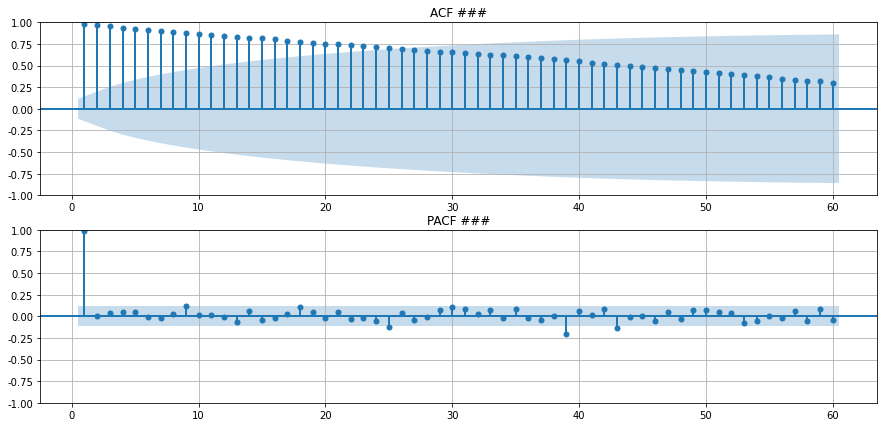

In [64]:
def plot_acf_pacf(series, lags_n=10, stock_name=""):
    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    sgt.plot_acf(series, lags = lags_n, zero = False, ax=ax1)
    ax1.set_title(f"ACF {stock_name}")

    sgt.plot_pacf(series, lags = lags_n, zero = False, method = ('ols'), ax=ax2)
    ax2.set_title(f"PACF {stock_name}")

    plt.show()

plot_acf_pacf(df["Adj_Close"], lags_n= 60 , stock_name="###")
